In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as po
import plotly.offline as py 
from sklearn import tree
#from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff

In [ ]:
#df = pd.read_csv('samvikas_data.csv')

In [6]:
df = pd.read_csv('Samvikas_data_record.csv')

In [183]:
df

,Name,Months,Height,Gender,Contact,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Location,Unnamed: 12
0,pooja,3,50,f,9560894553,1,0,0,0,0,0,DIBANG VALLEY,NaN
1,nisha,4,45,f,9560894554,0,0,0,0,0,0,WEST KAMENG,NaN
2,bimla,5,58,f,9560894555,1,1,0,0,0,0,EAST KAMENG,NaN
3,rada,3,49,f,9560894556,0,0,0,0,0,0,TAWANG(W KAME,NaN
4,maya,4,52,f,9560894557,1,0,0,0,0,0,KURUNG KUMEY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,leela,3,49,f,9560894652,0,0,0,0,0,0,KAITHAL,NaN
100,isha,6,52,f,9560894653,0,0,0,0,0,0,TARN TARAN,NaN
101,gulshan,7,55,f,9560894654,1,1,1,0,0,0,BILASPUR,NaN
102,priya jain,4,70,f,9560894655,1,1,0,0,0,0,CHAMBA,NaN


In [7]:
df.rename(columns={'Unnamed: 12': 'Score'}, inplace=True)

In [8]:
df.columns

Index(['Name', 'Months', 'Height', 'Gender', 'Contact', 'Feature 1',
       'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6',
       'Location', 'Score'],
      dtype='object')

In [9]:
print(df.head())

    Name  Months  Height Gender  ...  Feature 5  Feature 6       Location  Score
0  pooja       3      50      f  ...          0          0  DIBANG VALLEY    NaN
1  nisha       4      45      f  ...          0          0    WEST KAMENG    NaN
2  bimla       5      58      f  ...          0          0    EAST KAMENG    NaN
3   rada       3      49      f  ...          0          0  TAWANG(W KAME    NaN
4   maya       4      52      f  ...          0          0   KURUNG KUMEY    NaN

[5 rows x 13 columns]


In [10]:
df.shape

(104, 13)

In [11]:
df1 = df.fillna(0)
df1

,Name,Months,Height,Gender,Contact,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Location,Score
0,pooja,3,50,f,9560894553,1,0,0,0,0,0,DIBANG VALLEY,0.0
1,nisha,4,45,f,9560894554,0,0,0,0,0,0,WEST KAMENG,0.0
2,bimla,5,58,f,9560894555,1,1,0,0,0,0,EAST KAMENG,0.0
3,rada,3,49,f,9560894556,0,0,0,0,0,0,TAWANG(W KAME,0.0
4,maya,4,52,f,9560894557,1,0,0,0,0,0,KURUNG KUMEY,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,leela,3,49,f,9560894652,0,0,0,0,0,0,KAITHAL,0.0
100,isha,6,52,f,9560894653,0,0,0,0,0,0,TARN TARAN,0.0
101,gulshan,7,55,f,9560894654,1,1,1,0,0,0,BILASPUR,0.0
102,priya jain,4,70,f,9560894655,1,1,0,0,0,0,CHAMBA,0.0


In [12]:
df2 = df1[df1.columns.drop(['Height'])]

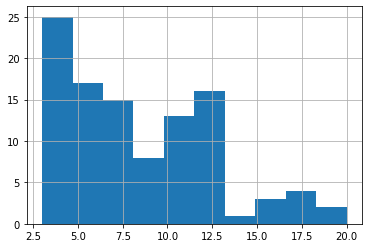

In [13]:
#visualization 
df2['Months'].hist()

In [14]:
#visualization 

df2.columns

Index(['Name', 'Months', 'Gender', 'Contact', 'Feature 1', 'Feature 2',
       'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Location',
       'Score'],
      dtype='object')

In [15]:
df2.dtypes

Name          object
Months         int64
Gender        object
Contact        int64
Feature 1      int64
Feature 2      int64
Feature 3      int64
Feature 4      int64
Feature 5      int64
Feature 6      int64
Location      object
Score        float64
dtype: object

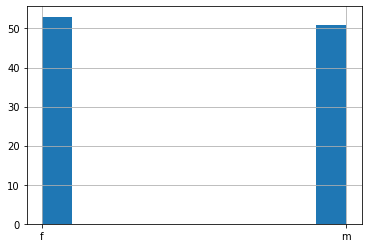

In [16]:
#visualization 
df2['Gender'].hist()

In [17]:
df2['Score'] = (df2['Feature 1'] + df2['Feature 2']+ df2['Feature 3'] + df2['Feature 4']+ df2['Feature 5'] + df2['Feature 6'])

In [18]:
for index, row in df2.iterrows():
  print(row)
  

Name                 pooja
Months                   3
Gender                   f
Contact         9560894553
Feature 1                1
Feature 2                0
Feature 3                0
Feature 4                0
Feature 5                0
Feature 6                0
Location     DIBANG VALLEY
Score                    1
Name: 0, dtype: object
Name               nisha
Months                 4
Gender                 f
Contact       9560894554
Feature 1              0
Feature 2              0
Feature 3              0
Feature 4              0
Feature 5              0
Feature 6              0
Location     WEST KAMENG
Score                  0
Name: 1, dtype: object
Name               bimla
Months                 5
Gender                 f
Contact       9560894555
Feature 1              1
Feature 2              1
Feature 3              0
Feature 4              0
Feature 5              0
Feature 6              0
Location     EAST KAMENG
Score                  2
Name: 2, dtype: object
Name   

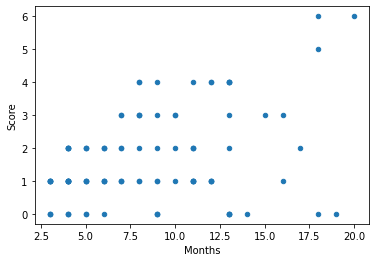

In [19]:
ax1 = df2.plot.scatter(x ='Months',y ='Score')
ax1

In [20]:
df3 = df2
df2.columns

Index(['Name', 'Months', 'Gender', 'Contact', 'Feature 1', 'Feature 2',
       'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Location',
       'Score'],
      dtype='object')

In [21]:
listy = []
for i, row in df3.iterrows():
  if row['Months'] >= 9 and row['Score'] <= 1 :
    ifor_val = 'Red'
  elif row['Months'] >= 12 and row['Score'] <= 2 :
    ifor_val = 'Red'
  elif row['Months'] >= 14 and row['Score'] <= 3 :
    ifor_val = 'Red'
  elif row['Months'] >= 15 and row['Score'] <= 4 :
    ifor_val = 'Red'
  elif row['Months'] >= 18 and row['Score'] <= 5 :
    ifor_val = 'Red'
  elif row['Months'] >= 19 and row['Score'] <= 6 :
    ifor_val = 'Red'
  else:
    ifor_val = 'Green'
  listy.append(ifor_val)

In [22]:
 df3['zones'] = listy
 df3.columns

Index(['Name', 'Months', 'Gender', 'Contact', 'Feature 1', 'Feature 2',
       'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Location', 'Score',
       'zones'],
      dtype='object')

In [23]:
df3['zones'].unique()


array(['Green', 'Red'], dtype=object)

In [24]:
df3.columns

Index(['Name', 'Months', 'Gender', 'Contact', 'Feature 1', 'Feature 2',
       'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Location', 'Score',
       'zones'],
      dtype='object')

In [25]:
from bokeh.io import output_file
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()
# My x-y coordinate data

In [26]:
index_cmap = factor_cmap('zones', palette=['red', 'blue'], 
                         factors=sorted(df3.zones.unique()))


source = ColumnDataSource(data=dict(
x = list(df3['Months']),
y = list(df3['Score']),
name = list(df3['Name']),
gender = list(df3['Gender']),
location = list(list(df3['Location']))
))

tooltips = [
           ("name","@name"),
            ("gender","@gender"),
            ("location","@location"),
            ("(x,y)", "($x, $y)"),     
           ]


# Output the visualization directly in the notebook
output_file('first_glyphs.html', title='First Glyphs')


In [27]:

# Create a figure with no toolbar and axis ranges of [0,3]
fig = figure(title='SamVikas',
             plot_height=400, plot_width=800,
             x_range=(2, 21), y_range=(-1, 7),
             toolbar_location=None,tooltips=tooltips)

# Draw the coordinates as circles
fig.circle('x','y', size= 10,fill_alpha=0.6, fill_color=index_cmap, source=source )


# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips))

# Show plot
show(fig)


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "zones" [renderer: GlyphRenderer(id='1042', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "zones" [renderer: GlyphRenderer(id='1042', ...)]


I will now customize the scatter. I will be coloring the bubbles according to the categorical variable Zone. We need to import factor_cmap. It will be used to map the colors according to the levels of Nutrition.

In [28]:
df3


,Name,Months,Gender,Contact,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Location,Score,zones
0,pooja,3,f,9560894553,1,0,0,0,0,0,DIBANG VALLEY,1,Green
1,nisha,4,f,9560894554,0,0,0,0,0,0,WEST KAMENG,0,Green
2,bimla,5,f,9560894555,1,1,0,0,0,0,EAST KAMENG,2,Green
3,rada,3,f,9560894556,0,0,0,0,0,0,TAWANG(W KAME,0,Green
4,maya,4,f,9560894557,1,0,0,0,0,0,KURUNG KUMEY,1,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,leela,3,f,9560894652,0,0,0,0,0,0,KAITHAL,0,Green
100,isha,6,f,9560894653,0,0,0,0,0,0,TARN TARAN,0,Green
101,gulshan,7,f,9560894654,1,1,1,0,0,0,BILASPUR,3,Green
102,priya jain,4,f,9560894655,1,1,0,0,0,0,CHAMBA,2,Green


In [29]:
df3.to_csv('out.csv', index=False)

In [233]:
index_cmap = factor_cmap('zones', palette=['red', 'blue'], 
                         factors=sorted(df3.zones.unique()))

In [234]:
source = ColumnDataSource(data=dict(
x = list(df3['Months']),
y = list(df3['Score']),
name = list(df3['Name']),
gender = list(df3['Gender']),
location = list(list(df3['Location']))
))

tooltips = [
           ("name","@name"),
            ("gender","@gender"),
            ("location","@location"),
            ("(x,y)", "($x, $y)"),     
           ]

p = figure(plot_width=600, plot_height=450, title = "SamVikas: Healthy x Mal",x_range=(2, 21), y_range=(0, 7),
            tooltips=tooltips)
p.scatter('Healthy','Need Attention',source=source, alpha=0.6, color=index_cmap,size=10)
p.xaxis.axis_label = 'Healthy'
p.yaxis.axis_label = 'Need Attention'


In [235]:
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "zones", key "line_color" value "zones", key "x" value "Healthy", key "y" value "Need Attention" [renderer: GlyphRenderer(id='14349', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "zones", key "line_color" value "zones", key "x" value "Healthy", key "y" value "Need Attention" [renderer: GlyphRenderer(id='14349', ...)]
